In [1]:
# from flask import Flask
# from gevent import pywsgi
from sklearn.linear_model import LogisticRegression
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import holidays
from sklearn.model_selection import GridSearchCV
import numpy as np

from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import itertools
# app = Flask(__name__)
df = pd.read_csv("D:/task/CTworkloadmodel/datacount7.csv")
#创建Prophet模型 holidays = holidays_df, 
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True,changepoint_prior_scale = '0.1',seasonality_prior_scale = '0.1')
#拟合数据,训练模型
#train_data = df[(df['ds']>='2022-07-01') & (df['ds']<'2023-07-01')]
train_data = df[df['ds']<'2023-07-01']
test_data = df[df['ds']>='2023-07-01']

In [2]:
# 定义参数网格
param_grid = {
    'changepoint_prior_scale': [0.0001,0.001,0.01,0.1,1.0],
    'seasonality_prior_scale': [0.0001,0.001,0.01,0.1,1.0]
    # 其他需要调优的参数
}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
# 交叉验证
results = []
for params in all_params:
    m = Prophet(**params)  # Fit model with given params
    m.add_country_holidays(country_name='CN')
    m.fit(df)
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon='30 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
# 选择最佳参数组合
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)
min_rmse_row = tuning_results [tuning_results ['rmse'] == tuning_results ['rmse'].min()]
print(min_rmse_row)
best_changepoint = min_rmse_row['changepoint_prior_scale'].values[0]
best_seasonality = min_rmse_row['seasonality_prior_scale'].values[0]

16:19:58 - cmdstanpy - INFO - Chain [1] start processing
16:19:58 - cmdstanpy - INFO - Chain [1] done processing
16:19:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:19:58 - cmdstanpy - INFO - Chain [1] start processing
16:19:59 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/18 [00:00<?, ?it/s]

16:19:59 - cmdstanpy - INFO - Chain [1] start processing
16:19:59 - cmdstanpy - INFO - Chain [1] done processing
16:19:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:19:59 - cmdstanpy - INFO - Chain [1] start processing
16:20:00 - cmdstanpy - INFO - Chain [1] done processing
16:20:00 - cmdstanpy - INFO - Chain [1] start processing
16:20:00 - cmdstanpy - INFO - Chain [1] done processing
16:20:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:20:00 - cmdstanpy - INFO - Chain [1] start processing
16:20:01 - cmdstanpy - INFO - Chain [1] done processing
16:20:01 - cmdstanpy - INFO - Chain [1] start processing
16:20:01 - cmdstanpy - INFO - Chain [1] done processing
16:20:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:20:29 - cmdstanpy - INFO - Chain [1] start processing
16:20:29 - cmdstanpy - INFO - Chain [1] done processing
16:20:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:20:29 - cmdstanpy - INFO - Chain [1] start processing
16:20:29 - cmdstanpy - INFO - Chain [1] done processing
16:20:30 - cmdstanpy - INFO - Chain [1] start processing
16:20:30 - cmdstanpy - INFO - Chain [1] done processing
16:20:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:20:30 - cmdstanpy - INFO - Chain [1] start processing
16:20:30 - cmdstanpy - INFO - Chain [1] done processing
16:20:30 - cmdstanpy - INFO - Chain [1] start processing
16:20:31 - cmdstanpy - INFO - Chain [1] done processing
16:20:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:21:20 - cmdstanpy - INFO - Chain [1] start processing
16:21:20 - cmdstanpy - INFO - Chain [1] done processing
16:21:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:21:20 - cmdstanpy - INFO - Chain [1] start processing
16:21:21 - cmdstanpy - INFO - Chain [1] done processing
16:21:21 - cmdstanpy - INFO - Chain [1] start processing
16:21:21 - cmdstanpy - INFO - Chain [1] done processing
16:21:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:21:21 - cmdstanpy - INFO - Chain [1] start processing
16:21:21 - cmdstanpy - INFO - Chain [1] done processing
16:21:22 - cmdstanpy - INFO - Chain [1] start processing
16:21:22 - cmdstanpy - INFO - Chain [1] done processing
16:21:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:22:28 - cmdstanpy - INFO - Chain [1] start processing
16:22:28 - cmdstanpy - INFO - Chain [1] done processing
16:22:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:22:28 - cmdstanpy - INFO - Chain [1] start processing
16:22:58 - cmdstanpy - INFO - Chain [1] done processing
16:22:58 - cmdstanpy - INFO - Chain [1] start processing
16:22:58 - cmdstanpy - INFO - Chain [1] done processing
16:22:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:22:58 - cmdstanpy - INFO - Chain [1] start processing
16:23:25 - cmdstanpy - INFO - Chain [1] done processing
16:23:25 - cmdstanpy - INFO - Chain [1] start processing
16:23:25 - cmdstanpy - INFO - Chain [1] done processing
16:23:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:24:16 - cmdstanpy - INFO - Chain [1] start processing
16:24:16 - cmdstanpy - INFO - Chain [1] done processing
16:24:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:24:16 - cmdstanpy - INFO - Chain [1] start processing
16:24:16 - cmdstanpy - INFO - Chain [1] done processing
16:24:17 - cmdstanpy - INFO - Chain [1] start processing
16:24:17 - cmdstanpy - INFO - Chain [1] done processing
16:24:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:24:17 - cmdstanpy - INFO - Chain [1] start processing
16:24:18 - cmdstanpy - INFO - Chain [1] done processing
16:24:18 - cmdstanpy - INFO - Chain [1] start processing
16:24:19 - cmdstanpy - INFO - Chain [1] done processing
16:24:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:24:53 - cmdstanpy - INFO - Chain [1] start processing
16:24:53 - cmdstanpy - INFO - Chain [1] done processing
16:24:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:24:53 - cmdstanpy - INFO - Chain [1] start processing
16:24:53 - cmdstanpy - INFO - Chain [1] done processing
16:24:54 - cmdstanpy - INFO - Chain [1] start processing
16:24:54 - cmdstanpy - INFO - Chain [1] done processing
16:24:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:24:54 - cmdstanpy - INFO - Chain [1] start processing
16:24:54 - cmdstanpy - INFO - Chain [1] done processing
16:24:55 - cmdstanpy - INFO - Chain [1] start processing
16:24:55 - cmdstanpy - INFO - Chain [1] done processing
16:24:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:25:06 - cmdstanpy - INFO - Chain [1] start processing
16:25:07 - cmdstanpy - INFO - Chain [1] done processing
16:25:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:07 - cmdstanpy - INFO - Chain [1] start processing
16:25:07 - cmdstanpy - INFO - Chain [1] done processing
16:25:07 - cmdstanpy - INFO - Chain [1] start processing
16:25:07 - cmdstanpy - INFO - Chain [1] done processing
16:25:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:08 - cmdstanpy - INFO - Chain [1] start processing
16:25:08 - cmdstanpy - INFO - Chain [1] done processing
16:25:08 - cmdstanpy - INFO - Chain [1] start processing
16:25:08 - cmdstanpy - INFO - Chain [1] done processing
16:25:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:25:20 - cmdstanpy - INFO - Chain [1] start processing
16:25:20 - cmdstanpy - INFO - Chain [1] done processing
16:25:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:20 - cmdstanpy - INFO - Chain [1] start processing
16:25:20 - cmdstanpy - INFO - Chain [1] done processing
16:25:21 - cmdstanpy - INFO - Chain [1] start processing
16:25:21 - cmdstanpy - INFO - Chain [1] done processing
16:25:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:21 - cmdstanpy - INFO - Chain [1] start processing
16:25:21 - cmdstanpy - INFO - Chain [1] done processing
16:25:22 - cmdstanpy - INFO - Chain [1] start processing
16:25:22 - cmdstanpy - INFO - Chain [1] done processing
16:25:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:25:34 - cmdstanpy - INFO - Chain [1] start processing
16:25:34 - cmdstanpy - INFO - Chain [1] done processing
16:25:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:34 - cmdstanpy - INFO - Chain [1] start processing
16:25:34 - cmdstanpy - INFO - Chain [1] done processing
16:25:35 - cmdstanpy - INFO - Chain [1] start processing
16:25:35 - cmdstanpy - INFO - Chain [1] done processing
16:25:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:35 - cmdstanpy - INFO - Chain [1] start processing
16:25:35 - cmdstanpy - INFO - Chain [1] done processing
16:25:36 - cmdstanpy - INFO - Chain [1] start processing
16:25:36 - cmdstanpy - INFO - Chain [1] done processing
16:25:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:25:51 - cmdstanpy - INFO - Chain [1] start processing
16:25:51 - cmdstanpy - INFO - Chain [1] done processing
16:25:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:51 - cmdstanpy - INFO - Chain [1] start processing
16:25:52 - cmdstanpy - INFO - Chain [1] done processing
16:25:52 - cmdstanpy - INFO - Chain [1] start processing
16:25:52 - cmdstanpy - INFO - Chain [1] done processing
16:25:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:25:52 - cmdstanpy - INFO - Chain [1] start processing
16:25:53 - cmdstanpy - INFO - Chain [1] done processing
16:25:53 - cmdstanpy - INFO - Chain [1] start processing
16:25:53 - cmdstanpy - INFO - Chain [1] done processing
16:25:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

  0%|          | 0/18 [00:00<?, ?it/s]

16:26:05 - cmdstanpy - INFO - Chain [1] start processing
16:26:06 - cmdstanpy - INFO - Chain [1] done processing
16:26:06 - cmdstanpy - INFO - Chain [1] start processing
16:26:06 - cmdstanpy - INFO - Chain [1] done processing
16:26:06 - cmdstanpy - INFO - Chain [1] start processing
16:26:06 - cmdstanpy - INFO - Chain [1] done processing
16:26:07 - cmdstanpy - INFO - Chain [1] start processing
16:26:07 - cmdstanpy - INFO - Chain [1] done processing
16:26:07 - cmdstanpy - INFO - Chain [1] start processing
16:26:07 - cmdstanpy - INFO - Chain [1] done processing
16:26:07 - cmdstanpy - INFO - Chain [1] start processing
16:26:08 - cmdstanpy - INFO - Chain [1] done processing
16:26:08 - cmdstanpy - INFO - Chain [1] start processing
16:26:08 - cmdstanpy - INFO - Chain [1] done processing
16:26:08 - cmdstanpy - INFO - Chain [1] start processing
16:26:09 - cmdstanpy - INFO - Chain [1] done processing
16:26:09 - cmdstanpy - INFO - Chain [1] start processing
16:26:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:26:14 - cmdstanpy - INFO - Chain [1] start processing
16:26:14 - cmdstanpy - INFO - Chain [1] done processing
16:26:14 - cmdstanpy - INFO - Chain [1] start processing
16:26:14 - cmdstanpy - INFO - Chain [1] done processing
16:26:14 - cmdstanpy - INFO - Chain [1] start processing
16:26:14 - cmdstanpy - INFO - Chain [1] done processing
16:26:15 - cmdstanpy - INFO - Chain [1] start processing
16:26:15 - cmdstanpy - INFO - Chain [1] done processing
16:26:15 - cmdstanpy - INFO - Chain [1] start processing
16:26:15 - cmdstanpy - INFO - Chain [1] done processing
16:26:15 - cmdstanpy - INFO - Chain [1] start processing
16:26:15 - cmdstanpy - INFO - Chain [1] done processing
16:26:16 - cmdstanpy - INFO - Chain [1] start processing
16:26:16 - cmdstanpy - INFO - Chain [1] done processing
16:26:16 - cmdstanpy - INFO - Chain [1] start processing
16:26:16 - cmdstanpy - INFO - Chain [1] done processing
16:26:17 - cmdstanpy - INFO - Chain [1] start processing
16:26:17 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:26:21 - cmdstanpy - INFO - Chain [1] start processing
16:26:21 - cmdstanpy - INFO - Chain [1] done processing
16:26:21 - cmdstanpy - INFO - Chain [1] start processing
16:26:21 - cmdstanpy - INFO - Chain [1] done processing
16:26:22 - cmdstanpy - INFO - Chain [1] start processing
16:26:22 - cmdstanpy - INFO - Chain [1] done processing
16:26:22 - cmdstanpy - INFO - Chain [1] start processing
16:26:22 - cmdstanpy - INFO - Chain [1] done processing
16:26:22 - cmdstanpy - INFO - Chain [1] start processing
16:26:22 - cmdstanpy - INFO - Chain [1] done processing
16:26:23 - cmdstanpy - INFO - Chain [1] start processing
16:26:23 - cmdstanpy - INFO - Chain [1] done processing
16:26:23 - cmdstanpy - INFO - Chain [1] start processing
16:26:23 - cmdstanpy - INFO - Chain [1] done processing
16:26:24 - cmdstanpy - INFO - Chain [1] start processing
16:26:24 - cmdstanpy - INFO - Chain [1] done processing
16:26:24 - cmdstanpy - INFO - Chain [1] start processing
16:26:24 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:26:28 - cmdstanpy - INFO - Chain [1] start processing
16:26:28 - cmdstanpy - INFO - Chain [1] done processing
16:26:29 - cmdstanpy - INFO - Chain [1] start processing
16:26:29 - cmdstanpy - INFO - Chain [1] done processing
16:26:29 - cmdstanpy - INFO - Chain [1] start processing
16:26:29 - cmdstanpy - INFO - Chain [1] done processing
16:26:29 - cmdstanpy - INFO - Chain [1] start processing
16:26:29 - cmdstanpy - INFO - Chain [1] done processing
16:26:30 - cmdstanpy - INFO - Chain [1] start processing
16:26:30 - cmdstanpy - INFO - Chain [1] done processing
16:26:30 - cmdstanpy - INFO - Chain [1] start processing
16:26:30 - cmdstanpy - INFO - Chain [1] done processing
16:26:31 - cmdstanpy - INFO - Chain [1] start processing
16:26:31 - cmdstanpy - INFO - Chain [1] done processing
16:26:31 - cmdstanpy - INFO - Chain [1] start processing
16:26:31 - cmdstanpy - INFO - Chain [1] done processing
16:26:31 - cmdstanpy - INFO - Chain [1] start processing
16:26:31 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [1] done processing
16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [1] done processing
16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [1] done processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] done processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] done processing
16:26:37 - cmdstanpy - INFO - Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain [1] done processing
16:26:38 - cmdstanpy - INFO - Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain [1] done processing
16:26:38 - cmdstanpy - INFO - Chain [1] start processing
16:26:38 - cmdstanpy - INFO - Chain [1] done processing
16:26:39 - cmdstanpy - INFO - Chain [1] start processing
16:26:39 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:26:43 - cmdstanpy - INFO - Chain [1] start processing
16:26:43 - cmdstanpy - INFO - Chain [1] done processing
16:26:44 - cmdstanpy - INFO - Chain [1] start processing
16:26:44 - cmdstanpy - INFO - Chain [1] done processing
16:26:44 - cmdstanpy - INFO - Chain [1] start processing
16:26:44 - cmdstanpy - INFO - Chain [1] done processing
16:26:45 - cmdstanpy - INFO - Chain [1] start processing
16:26:45 - cmdstanpy - INFO - Chain [1] done processing
16:26:45 - cmdstanpy - INFO - Chain [1] start processing
16:26:45 - cmdstanpy - INFO - Chain [1] done processing
16:26:46 - cmdstanpy - INFO - Chain [1] start processing
16:26:46 - cmdstanpy - INFO - Chain [1] done processing
16:26:46 - cmdstanpy - INFO - Chain [1] start processing
16:26:46 - cmdstanpy - INFO - Chain [1] done processing
16:26:47 - cmdstanpy - INFO - Chain [1] start processing
16:26:47 - cmdstanpy - INFO - Chain [1] done processing
16:26:47 - cmdstanpy - INFO - Chain [1] start processing
16:26:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:26:54 - cmdstanpy - INFO - Chain [1] start processing
16:26:54 - cmdstanpy - INFO - Chain [1] done processing
16:26:54 - cmdstanpy - INFO - Chain [1] start processing
16:26:54 - cmdstanpy - INFO - Chain [1] done processing
16:26:54 - cmdstanpy - INFO - Chain [1] start processing
16:26:55 - cmdstanpy - INFO - Chain [1] done processing
16:26:55 - cmdstanpy - INFO - Chain [1] start processing
16:26:55 - cmdstanpy - INFO - Chain [1] done processing
16:26:55 - cmdstanpy - INFO - Chain [1] start processing
16:26:55 - cmdstanpy - INFO - Chain [1] done processing
16:26:56 - cmdstanpy - INFO - Chain [1] start processing
16:26:56 - cmdstanpy - INFO - Chain [1] done processing
16:26:56 - cmdstanpy - INFO - Chain [1] start processing
16:26:56 - cmdstanpy - INFO - Chain [1] done processing
16:26:56 - cmdstanpy - INFO - Chain [1] start processing
16:26:56 - cmdstanpy - INFO - Chain [1] done processing
16:26:57 - cmdstanpy - INFO - Chain [1] start processing
16:26:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:01 - cmdstanpy - INFO - Chain [1] start processing
16:27:01 - cmdstanpy - INFO - Chain [1] done processing
16:27:02 - cmdstanpy - INFO - Chain [1] start processing
16:27:02 - cmdstanpy - INFO - Chain [1] done processing
16:27:02 - cmdstanpy - INFO - Chain [1] start processing
16:27:02 - cmdstanpy - INFO - Chain [1] done processing
16:27:02 - cmdstanpy - INFO - Chain [1] start processing
16:27:02 - cmdstanpy - INFO - Chain [1] done processing
16:27:03 - cmdstanpy - INFO - Chain [1] start processing
16:27:03 - cmdstanpy - INFO - Chain [1] done processing
16:27:03 - cmdstanpy - INFO - Chain [1] start processing
16:27:03 - cmdstanpy - INFO - Chain [1] done processing
16:27:03 - cmdstanpy - INFO - Chain [1] start processing
16:27:03 - cmdstanpy - INFO - Chain [1] done processing
16:27:04 - cmdstanpy - INFO - Chain [1] start processing
16:27:04 - cmdstanpy - INFO - Chain [1] done processing
16:27:04 - cmdstanpy - INFO - Chain [1] start processing
16:27:04 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:09 - cmdstanpy - INFO - Chain [1] start processing
16:27:09 - cmdstanpy - INFO - Chain [1] done processing
16:27:09 - cmdstanpy - INFO - Chain [1] start processing
16:27:09 - cmdstanpy - INFO - Chain [1] done processing
16:27:09 - cmdstanpy - INFO - Chain [1] start processing
16:27:09 - cmdstanpy - INFO - Chain [1] done processing
16:27:10 - cmdstanpy - INFO - Chain [1] start processing
16:27:10 - cmdstanpy - INFO - Chain [1] done processing
16:27:10 - cmdstanpy - INFO - Chain [1] start processing
16:27:10 - cmdstanpy - INFO - Chain [1] done processing
16:27:10 - cmdstanpy - INFO - Chain [1] start processing
16:27:10 - cmdstanpy - INFO - Chain [1] done processing
16:27:11 - cmdstanpy - INFO - Chain [1] start processing
16:27:11 - cmdstanpy - INFO - Chain [1] done processing
16:27:11 - cmdstanpy - INFO - Chain [1] start processing
16:27:11 - cmdstanpy - INFO - Chain [1] done processing
16:27:12 - cmdstanpy - INFO - Chain [1] start processing
16:27:12 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:16 - cmdstanpy - INFO - Chain [1] start processing
16:27:16 - cmdstanpy - INFO - Chain [1] done processing
16:27:16 - cmdstanpy - INFO - Chain [1] start processing
16:27:17 - cmdstanpy - INFO - Chain [1] done processing
16:27:17 - cmdstanpy - INFO - Chain [1] start processing
16:27:17 - cmdstanpy - INFO - Chain [1] done processing
16:27:17 - cmdstanpy - INFO - Chain [1] start processing
16:27:17 - cmdstanpy - INFO - Chain [1] done processing
16:27:18 - cmdstanpy - INFO - Chain [1] start processing
16:27:18 - cmdstanpy - INFO - Chain [1] done processing
16:27:18 - cmdstanpy - INFO - Chain [1] start processing
16:27:18 - cmdstanpy - INFO - Chain [1] done processing
16:27:18 - cmdstanpy - INFO - Chain [1] start processing
16:27:18 - cmdstanpy - INFO - Chain [1] done processing
16:27:19 - cmdstanpy - INFO - Chain [1] start processing
16:27:19 - cmdstanpy - INFO - Chain [1] done processing
16:27:19 - cmdstanpy - INFO - Chain [1] start processing
16:27:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:24 - cmdstanpy - INFO - Chain [1] start processing
16:27:24 - cmdstanpy - INFO - Chain [1] done processing
16:27:24 - cmdstanpy - INFO - Chain [1] start processing
16:27:24 - cmdstanpy - INFO - Chain [1] done processing
16:27:25 - cmdstanpy - INFO - Chain [1] start processing
16:27:25 - cmdstanpy - INFO - Chain [1] done processing
16:27:25 - cmdstanpy - INFO - Chain [1] start processing
16:27:25 - cmdstanpy - INFO - Chain [1] done processing
16:27:25 - cmdstanpy - INFO - Chain [1] start processing
16:27:26 - cmdstanpy - INFO - Chain [1] done processing
16:27:26 - cmdstanpy - INFO - Chain [1] start processing
16:27:26 - cmdstanpy - INFO - Chain [1] done processing
16:27:26 - cmdstanpy - INFO - Chain [1] start processing
16:27:27 - cmdstanpy - INFO - Chain [1] done processing
16:27:27 - cmdstanpy - INFO - Chain [1] start processing
16:27:27 - cmdstanpy - INFO - Chain [1] done processing
16:27:27 - cmdstanpy - INFO - Chain [1] start processing
16:27:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:33 - cmdstanpy - INFO - Chain [1] start processing
16:27:33 - cmdstanpy - INFO - Chain [1] done processing
16:27:33 - cmdstanpy - INFO - Chain [1] start processing
16:27:33 - cmdstanpy - INFO - Chain [1] done processing
16:27:33 - cmdstanpy - INFO - Chain [1] start processing
16:27:34 - cmdstanpy - INFO - Chain [1] done processing
16:27:34 - cmdstanpy - INFO - Chain [1] start processing
16:27:34 - cmdstanpy - INFO - Chain [1] done processing
16:27:34 - cmdstanpy - INFO - Chain [1] start processing
16:27:34 - cmdstanpy - INFO - Chain [1] done processing
16:27:35 - cmdstanpy - INFO - Chain [1] start processing
16:27:35 - cmdstanpy - INFO - Chain [1] done processing
16:27:35 - cmdstanpy - INFO - Chain [1] start processing
16:27:35 - cmdstanpy - INFO - Chain [1] done processing
16:27:35 - cmdstanpy - INFO - Chain [1] start processing
16:27:36 - cmdstanpy - INFO - Chain [1] done processing
16:27:36 - cmdstanpy - INFO - Chain [1] start processing
16:27:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] done processing
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] done processing
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
16:27:44 - cmdstanpy - INFO - Chain [1] start processing
16:27:44 - cmdstanpy - INFO - Chain [1] done processing
16:27:44 - cmdstanpy - INFO - Chain [1] start processing
16:27:44 - cmdstanpy - INFO - Chain [1] done processing
16:27:45 - cmdstanpy - INFO - Chain [1] start processing
16:27:45 - cmdstanpy - INFO - Chain [1] done processing
16:27:45 - cmdstanpy - INFO - Chain [1] start processing
16:27:45 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:50 - cmdstanpy - INFO - Chain [1] start processing
16:27:51 - cmdstanpy - INFO - Chain [1] done processing
16:27:51 - cmdstanpy - INFO - Chain [1] start processing
16:27:51 - cmdstanpy - INFO - Chain [1] done processing
16:27:51 - cmdstanpy - INFO - Chain [1] start processing
16:27:51 - cmdstanpy - INFO - Chain [1] done processing
16:27:52 - cmdstanpy - INFO - Chain [1] start processing
16:27:52 - cmdstanpy - INFO - Chain [1] done processing
16:27:52 - cmdstanpy - INFO - Chain [1] start processing
16:27:52 - cmdstanpy - INFO - Chain [1] done processing
16:27:52 - cmdstanpy - INFO - Chain [1] start processing
16:27:52 - cmdstanpy - INFO - Chain [1] done processing
16:27:53 - cmdstanpy - INFO - Chain [1] start processing
16:27:53 - cmdstanpy - INFO - Chain [1] done processing
16:27:53 - cmdstanpy - INFO - Chain [1] start processing
16:27:53 - cmdstanpy - INFO - Chain [1] done processing
16:27:54 - cmdstanpy - INFO - Chain [1] start processing
16:27:54 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/18 [00:00<?, ?it/s]

16:27:59 - cmdstanpy - INFO - Chain [1] start processing
16:27:59 - cmdstanpy - INFO - Chain [1] done processing
16:28:00 - cmdstanpy - INFO - Chain [1] start processing
16:28:00 - cmdstanpy - INFO - Chain [1] done processing
16:28:00 - cmdstanpy - INFO - Chain [1] start processing
16:28:00 - cmdstanpy - INFO - Chain [1] done processing
16:28:00 - cmdstanpy - INFO - Chain [1] start processing
16:28:01 - cmdstanpy - INFO - Chain [1] done processing
16:28:01 - cmdstanpy - INFO - Chain [1] start processing
16:28:01 - cmdstanpy - INFO - Chain [1] done processing
16:28:01 - cmdstanpy - INFO - Chain [1] start processing
16:28:01 - cmdstanpy - INFO - Chain [1] done processing
16:28:02 - cmdstanpy - INFO - Chain [1] start processing
16:28:02 - cmdstanpy - INFO - Chain [1] done processing
16:28:02 - cmdstanpy - INFO - Chain [1] start processing
16:28:02 - cmdstanpy - INFO - Chain [1] done processing
16:28:02 - cmdstanpy - INFO - Chain [1] start processing
16:28:02 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale        rmse
0                    0.0001                   0.0001  198.339631
1                    0.0001                   0.0010  197.305833
2                    0.0001                   0.0100  141.224269
3                    0.0001                   0.1000  139.956403
4                    0.0001                   1.0000  138.788744
5                    0.0010                   0.0001  206.975374
6                    0.0010                   0.0010  205.737723
7                    0.0010                   0.0100  148.819797
8                    0.0010                   0.1000  145.179956
9                    0.0010                   1.0000  146.030176
10                   0.0100                   0.0001  199.100323
11                   0.0100                   0.0010  197.410643
12                   0.0100                   0.0100  141.751985
13                   0.0100                   0.1000  148.610034
14                   0.01

16:28:07 - cmdstanpy - INFO - Chain [1] start processing
16:28:08 - cmdstanpy - INFO - Chain [1] done processing


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-02-01  424.255788 -203.522770  682.708779   424.255788   424.255788   
1   2021-02-02  424.306058 -202.942352  674.959045   424.306058   424.306058   
2   2021-02-03  424.356328 -250.976534  673.920568   424.356328   424.356328   
3   2021-02-04  424.406598 -258.232242  650.362103   424.406598   424.406598   
4   2021-02-05  424.456868 -280.098075  621.592384   424.456868   424.456868   
..         ...         ...         ...         ...          ...          ...   
906 2023-07-27  469.892187 -148.502198  750.695554   469.892111   469.892254   
907 2023-07-28  469.942565 -197.243220  687.948858   469.942485   469.942636   
908 2023-07-29  469.992943 -309.035781  569.499161   469.992858   469.993019   
909 2023-07-30  470.043321 -324.207141  507.375920   470.043232   470.043403   
910 2023-07-31  470.093699 -116.845318  735.890597   470.093604   470.093786   

     Chinese New Year (Spring Festival)

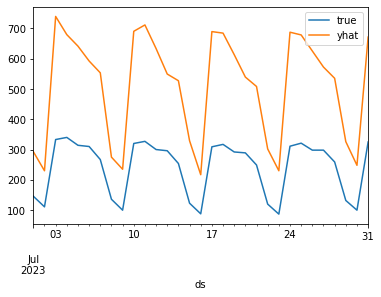

In [3]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True,changepoint_prior_scale=best_changepoint, seasonality_prior_scale=best_seasonality)
m.add_country_holidays(country_name='CN')
train_data = df[df['ds']<'2023-07-01']
test_data = df[df['ds']>='2023-07-01']
m.fit(train_data)
future = m.make_future_dataframe(periods=31,freq='D')
forecast = m.predict(future)
print(forecast)
# 验证
# 把ds列，即ds列设置为索引列
test_data = test_data.set_index('ds')
test_data.index = pd.to_datetime(test_data.index)

# 把预测到的数据取出ds列，预测值列yhat，同样把ds列设置为索引列。
forecast = forecast.tail(31)
forecast = forecast[['ds','yhat']].set_index('ds')

#将预测数据和真实数据进行合并
df_all = pd.merge(forecast,test_data,left_index=True, right_index=True)
df_all['yhat'] = round(df_all['yhat'])

df_all.plot()
# 设置左上角小标
plt.legend(['true', 'yhat'])
df_all['gap'] = abs(df_all['yhat'] - df_all['y'])
df_all['yhat'] = df_all['yhat'].astype('int32')
df_all['gap'] = df_all['gap'].astype('int32')
gapsum = df_all['gap'].sum()
sumall = df_all['y'].sum()
percent = gapsum/sumall
print(percent)